In [ ]:
!pip install pyldavis

In [2]:
import gensim
import gensim.corpora as corpora
from gensim.corpora import Dictionary
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel
import pyLDAvis
import pandas as pd


In [3]:
# CSV 파일에서 데이터 불러오기
data = pd.read_excel('정제파일.xlsx')
data = data.astype('str')
data=data['제목_초록']

In [4]:
# 'data' 리스트에 저장된 텍스트 데이터(예: '제목_본문')를 공백 기준으로 분할하여 토큰 리스트를 생성합니다.
token = [keywords.split() for keywords in data]
# 토큰 리스트를 기반으로 Gensim의 Dictionary 객체를 생성합니다. 이 객체는 각 토큰에 고유한 ID를 매핑합니다.
# 결과적으로, 텍스트 데이터의 모든 유니크한 단어가 ID와 함께 딕셔너리로 관리됩니다.
id2word = corpora.Dictionary(token)

# 딕셔너리에서 빈도수 기반으로 단어를 필터링합니다. no_below와 no_above 파라미터를 사용하여,
# 너무 드물게 나타나는 단어(no_below 이하)와 너무 자주 나타나는 단어(no_above 이상)를 제거합니다.
# no_below=3는 각 단어가 최소 3개의 문서에 나타나야 함을 의미합니다.
# no_above=0.1는 전체 문서의 10% 미만에만 나타나는 단어를 유지함을 의미합니다.
id2word.filter_extremes(no_below=5, no_above=0.2)

# 최종적으로, 각 문서를 (단어 ID, 단어 빈도) 튜플의 리스트로 변환하는 문서-단어 빈도 매트릭스(corpus)를 생성합니다.
# 이 과정에서 각 문서 내에 있는 단어들이 얼마나 자주 나타나는지를 기록합니다.
# 이 corpus는 텍스트 데이터를 기반으로 한 다양한 모델링 작업(예: LDA 주제 모델링)에 사용될 수 있습니다.
corpus = [id2word.doc2bow(text) for text in token]


In [7]:
# numpy 라이브러리를 np라는 이름으로 가져옵니다. numpy는 다양한 수학적 연산을 위해 사용됩니다.
import numpy as np

# 퍼플렉시티 값을 저장할 빈 리스트를 초기화합니다. 이 리스트는 후에 모델 성능 평가에 사용됩니다.
perplexity_values = []

# 토픽의 수를 3에서 9까지 변화시키면서 LDA 모델의 퍼플렉시티를 계산합니다.
# 토픽 수가 변할 때마다 모델의 성능을 퍼플렉시티를 통해 평가합니다.
for i in range(3, 10):
    # LDA 모델을 생성합니다. 'num_topics=i'는 토픽의 수를 i로 설정합니다.
    # 'id2word'는 단어의 인덱스 매핑을 나타내는 사전입니다.
    # 'random_state=100'는 모델 결과의 재현 가능성을 위해 난수 생성기의 시드를 설정합니다.
    ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=i, id2word=id2word, random_state=100)

    # 모델의 로그 퍼플렉시티를 계산하고, 이를 자연로그의 밑인 e를 기반으로 하는 지수 함수로 변환하여
    # 퍼플렉시티를 계산합니다. 퍼플렉시티 값이 낮을수록 모델이 데이터를 더 잘 설명하고 있다는 의미입니다.
    perplexity = np.exp(ldamodel.log_perplexity(corpus))

    # 계산된 퍼플렉시티를 리스트에 추가합니다.
    perplexity_values.append(perplexity)


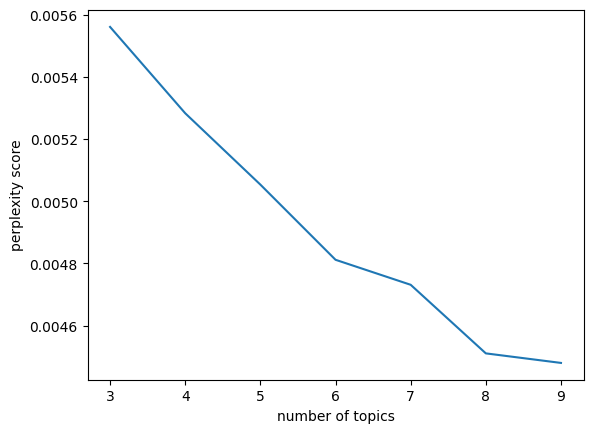

In [8]:
# Perplexity 그래프 시각화
import matplotlib.pyplot as plt

x = range(3, 10)
plt.plot(x, perplexity_values)
plt.xlabel("number of topics")
plt.ylabel("perplexity score")
plt.show()

In [9]:
from gensim.models import CoherenceModel  # CoherenceModel 임포트

coherence_values = []
# 다양한 토픽 수에 대해 Coherence 계산
for i in range(3, 10):
    ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=i, id2word=id2word,random_state=100)
    coherence_model_lda = CoherenceModel(model=ldamodel, texts=token, dictionary=id2word, topn=10)
    coherence_lda = coherence_model_lda.get_coherence()
    coherence_values.append(coherence_lda)

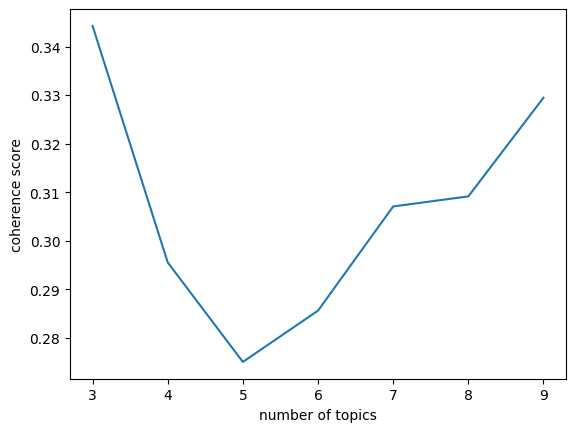

In [10]:
x = range(3, 10)
plt.plot(x, coherence_values)
plt.xlabel("number of topics")
plt.ylabel("coherence score")
plt.show()

In [11]:
k=4 ###적정토픽수 입력 coherence를 최대로 하고 perpelxity를 최소로 하는 적절합 토픽수

In [12]:
#적정토픽에 해당 되는 단어를 구하기!
from gensim import corpora, models
# 적절한 토픽 수를 설정하여 LDA 모델 훈련
model = LdaModel(corpus=corpus, num_topics=k, id2word=id2word, passes=15,random_state=100)  # num_topic에 적절 토픽 수 설정
topics = model.print_topics(num_words=15) ####토픽당 단어수설정

In [13]:
topics

[(0,
  '0.074*"\'데이터\'," + 0.035*"\'로봇\'," + 0.034*"\'학습\'," + 0.030*"\'편향\'," + 0.030*"\'활용\'," + 0.024*"\'과정\'," + 0.021*"\'개발\'," + 0.017*"\'알고리즘\'," + 0.017*"\'도덕\'," + 0.014*"\'판단\'," + 0.014*"\'논의\'," + 0.013*"\'통해\'," + 0.012*"\'변화\'," + 0.012*"\'발생\'," + 0.012*"\'원칙\',"'),
 (1,
  '0.044*"\'내용\'," + 0.039*"\'관점\'," + 0.035*"\'철학\'," + 0.034*"\'윤리학\'," + 0.034*"\'분석\'," + 0.029*"\'관련\'," + 0.025*"\'논문\'," + 0.025*"\'인식\'," + 0.024*"\'적용\'," + 0.019*"\'체계\'," + 0.018*"\'개념\'," + 0.018*"\'가지\'," + 0.017*"\'원칙\'," + 0.017*"\'특성\'," + 0.017*"\'로봇\',"'),
 (2,
  '0.085*"\'도덕\'," + 0.045*"\'원칙\'," + 0.036*"\'영역\'," + 0.030*"\'통한\'," + 0.028*"\'방향\'," + 0.025*"\'관계\'," + 0.022*"\'중심\'," + 0.021*"\'사람\'," + 0.021*"\'제시\'," + 0.019*"\'가지\'," + 0.018*"\'사용자\'," + 0.017*"\'모색\'," + 0.017*"\'이해\'," + 0.016*"\'로서\'," + 0.016*"\'실제\',"'),
 (3,
  '0.032*"\'분석\'," + 0.023*"\'의미\'," + 0.022*"\'책임\'," + 0.022*"\'기반\'," + 0.022*"\'메타\'," + 0.019*"\'시대\'," + 0.019*"\'우리\'," + 0.018*"\'관계\'," + 0.017*

In [14]:
# 도출된 토픽을 CSV 파일로 저장
TOPIC={'topics':topics}
TOPIC=pd.DataFrame(TOPIC)
TOPIC.to_excel('lda_result.xlsx')

In [15]:
import pyLDAvis
import pyLDAvis.gensim
pyLDAvis.enable_notebook() # Jupyter Notebook에서 pyLDAvis 시각화를 사용할 수 있도록 설정
# pyLDAvis를 이용해 LDA 모델 시각화
vis = pyLDAvis.gensim.prepare(model, corpus, id2word)
vis  # 시각화 객체 출력

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.010150  0.095857       1        1  34.041486
3     -0.029149  0.056916       2        1  29.149037
2     -0.117130 -0.084826       3        1  18.966500
1      0.136129 -0.067947       4        1  17.842976, topic_info=       Term       Freq      Total Category  logprob  loglift
35    '도덕',  57.000000  57.000000  Default  30.0000  30.0000
7    '데이터',  62.000000  62.000000  Default  29.0000  29.0000
5     '내용',  20.000000  20.000000  Default  28.0000  28.0000
150   '철학',  16.000000  16.000000  Default  27.0000  27.0000
100  '윤리학',  15.000000  15.000000  Default  26.0000  26.0000
..      ...        ...        ...      ...      ...      ...
138   '영역',   5.718600  33.524442   Topic4  -4.2699  -0.0450
68    '논의',   4.864859  22.305839   Topic4  -4.4316   0.2007
86    '활용',   5.275950  38.083970   Topic4  -4.3505  -0.2531
131   '목적',   4.238142  19.596512   Topic4  -4.5695   0.1923
80    '과정',   3.956597  26.911563   Topic4  -4.6382  -0.1936

[204 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
43        1  0.324994    '가능성',
43        2  0.417849    '가능성',
43        3  0.185711    '가능성',
43        4  0.092855    '가능성',
110       1  0.883516  '가이드라인',
...     ...       ...       ...
86        2  0.105031     '활용',
86        3  0.131289     '활용',
86        4  0.131289     '활용',
31        1  0.583787     '효과',
31        2  0.389191     '효과',

[410 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 4, 3, 2])